## Treinamento de Rede Neural Convolucional para Classificação de Imagens do Dataset MNIST

Notebook dedicado ao treinamento e teste de uma Rede Neural Convolucional para a classificação de algarismos escrito a mão da base de dados MNIST.

O script deve apresentar uma arquitetura válida de rede neural convolucional e acurácia maior que 95% no dataset MNIST (conjunto de treino) com apenas 3 épocas.

#### Importações de bibliotecas necessárias

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

2023-12-19 03:15:11.671650: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 03:15:11.761311: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 03:15:12.289231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 03:15:12.289286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 03:15:12.399881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Carregando o dataset

O MNIST (Modified National Institute of Standards and Technology) é um conjunto de dados amplamente utilizado em aprendizado de máquina e visão computacional. Ele consiste em 60.000 imagens de dígitos escritos à mão (0 a 9) em formato de 28x28 pixels, sendo frequentemente usado para treinar e testar algoritmos de reconhecimento de dígitos. O MNIST é uma referência comum para desenvolver e avaliar modelos de redes neurais e outras técnicas de processamento de imagem.

In [2]:
(imagens_treino, ids_treino), (imagens_teste, ids_teste) = mnist.load_data()

### Exemplo de imagem do conjunto de treino

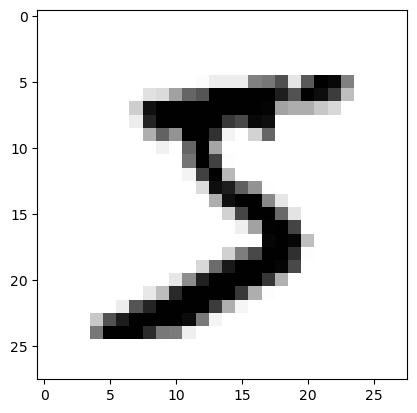

In [3]:
plt.imshow(imagens_treino[0],cmap=plt.cm.binary)
plt.show()

## Exemplo de imagem do conjunto de teste

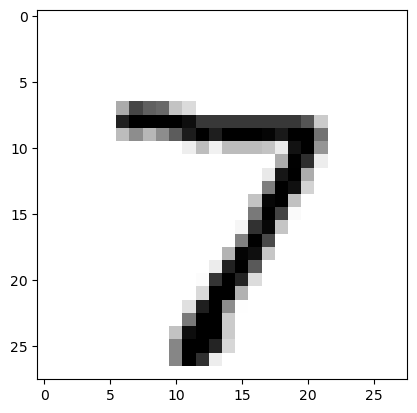

In [4]:
plt.imshow(imagens_teste[0],cmap=plt.cm.binary)
plt.show()

## Normalização das imagens de treino e teste


A normalização das imagens no conjunto de dados MNIST, dividindo os valores dos pixels por 255, é uma prática comum no pré-processamento de dados para treinamento de redes neurais. Essa normalização coloca os valores dos pixels em uma escala entre 0 e 1, facilitando o treinamento da rede neural. Algoritmos de otimização, como o gradiente descendente, muitas vezes convergem mais rapidamente quando os dados estão nessa faixa, resultando em treinamento mais eficiente e estável. Além disso, a normalização ajuda a evitar problemas relacionados a gradientes explosivos ou desaparecimento durante o treinamento da rede.

In [5]:
imagens_treino = (imagens_treino / 255.0)
imagens_teste = (imagens_teste / 255.0)

## Configurando o MLP


Esse código cria um modelo de rede neural usando a biblioteca TensorFlow (presumivelmente em Python)

1. Sequential Model: model3 é uma instância de um modelo sequencial, o que significa que as camadas são empilhadas sequencialmente uma após a outra.

2. Flatten Layer: tf.keras.layers.Flatten() é uma camada que transforma os dados de entrada, que são imagens 28x28 no contexto do MNIST, em um vetor unidimensional de tamanho 1x784. Isso é necessário antes de alimentar os dados em camadas densas (totalmente conectadas) subsequentes.

3. Dense Layers: Em seguida, há duas camadas densas (totalmente conectadas) com ativação ReLU. A primeira camada tem 128 unidades, e a segunda também tem 128 unidades.

4. Output Layer: A última camada é outra camada densa, mas com 10 unidades e ativação softmax. Isso é apropriado para problemas de classificação com 10 classes, como o MNIST, onde cada unidade na camada de saída representa a probabilidade da imagem pertencer a uma classe específica (dígitos de 0 a 9).

In [6]:
model3 = tf.keras.models.Sequential()  # a basic feed-forward model
model3.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model3.add(tf.keras.layers.Dense(128, input_dim=784, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model3.add(tf.keras.layers.Dense(128, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model3.add(tf.keras.layers.Dense(10, activation="softmax"))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

A célula abaixo compila o modelo neural criado anteriormente usando a biblioteca TensorFlow.

1. Optimizer: O otimizador 'adam' é escolhido para ajustar os pesos da rede durante o treinamento. O otimizador Adam é uma escolha comum devido à sua eficiência e bom desempenho em muitos casos.

2. Loss Function: A função de perda é definida como 'sparse_categorical_crossentropy'. Esta é uma escolha adequada para problemas de classificação com várias classes (como o MNIST), onde cada exemplo pertence a apenas uma classe. A função de perda mede quão bem o modelo está performando em termos de quão distante suas previsões estão da verdadeira distribuição de classes.

3. Metrics: Durante o treinamento, a métrica de desempenho monitorada é 'accuracy', que indica a precisão do modelo, ou seja, a proporção de exemplos classificados corretamente entre todos os exemplos.

In [7]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando

Utilizzando o método fit para treinar o modelo neural model3 com dados de treino (imagens_treino e ids_treino) ao longo de três épocas. Durante o treinamento, o modelo ajusta seus pesos com base na otimização do otimizador 'adam', minimizando a função de perda 'sparse_categorical_crossentropy'. Além disso, são fornecidos dados de validação (imagens_teste e ids_teste) para avaliar o desempenho do modelo em um conjunto independente. O processo de treinamento visa melhorar a capacidade do modelo em fazer previsões precisas sobre novos dados, enquanto as épocas representam o número de vezes que o modelo passa por todo o conjunto de treino.

In [8]:
model3.fit(imagens_treino, ids_treino, epochs=3, validation_data=(imagens_teste, ids_teste))

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2298 - accuracy: 0.9308 - val_loss: 0.1224 - val_accuracy: 0.9631
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0960 - accuracy: 0.9704 - val_loss: 0.0860 - val_accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0682 - accuracy: 0.9783 - val_loss: 0.0939 - val_accuracy: 0.9708


## Testando o resultado

Avaliação do modelo neural model3 usando o conjunto de teste (imagens_teste e ids_teste). O método evaluate calcula a perda e a acurácia do modelo no conjunto de teste. A perda é armazenada na variável loss_teste e a acurácia na variável acuracia_teste. Em seguida, a acurácia é impressa, fornecendo uma medida do quão bem o modelo generaliza para dados não vistos. Essa avaliação é crucial para entender o desempenho do modelo em um conjunto de dados independente e verificar se ele está apto para fazer previsões precisas em novos exemplos.

In [9]:
loss_teste, acuracia_teste = model3.evaluate(imagens_teste, ids_teste, verbose=2)
print("Acurácia para o conjunto de teste: ", acuracia_teste)

313/313 - 1s - loss: 0.0939 - accuracy: 0.9708 - 686ms/epoch - 2ms/step
Acurácia para o conjunto de teste:  0.97079998254776


### Predição de imagens

Exemplo com predições de imagens com o modelo treinado e avaliado.

1/1 [==============================] - 0s 15ms/step


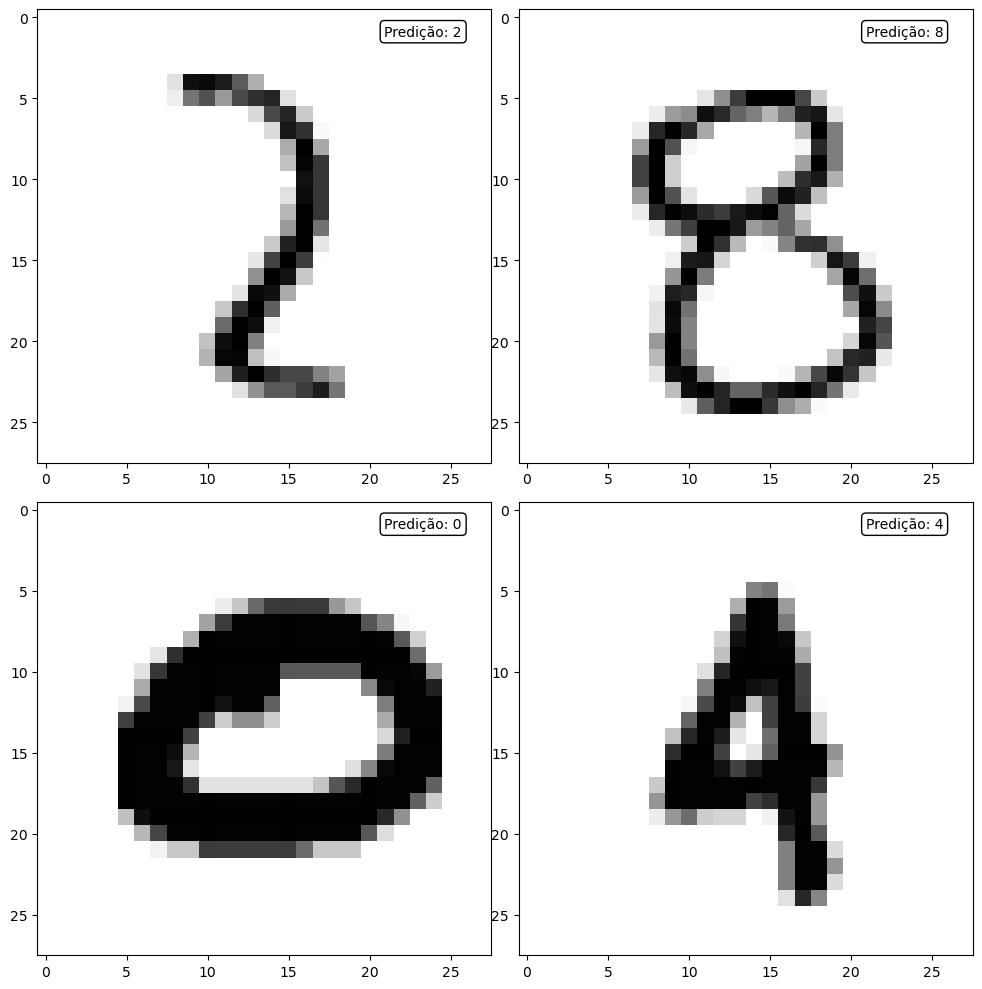

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Escolher aleatoriamente 4 imagens do conjunto de teste MNIST
random_indices = random.sample(range(len(imagens_teste)), 4)

# Configurar a grade de plotagem
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i, random_index in enumerate(random_indices, 1):
    # Selecionar uma imagem aleatória e fazer a predição
    imagem_aleatoria = imagens_teste[random_index]
    imagem_aleatoria_reshaped = imagem_aleatoria.reshape(1, 28, 28, 1)
    predicoes = model3.predict(imagem_aleatoria_reshaped)
    id_predita = np.argmax(predicoes)

    # Plotar a imagem
    plt.subplot(2, 2, i)
    plt.imshow(imagem_aleatoria.reshape(28, 28), cmap=plt.cm.binary)
 
   # Adicionar a predição como anotação
    plt.annotate(
        f'Predição: {id_predita}',
        xy=(0.85, 0.95),
        xycoords='axes fraction',
        ha='center',
        va='center',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.tight_layout()

# Exibir a grade de plotagem
plt.show()